In [1]:
# example of loading a pix2pix model and using it for image to image translation
from keras.models import load_model
from numpy import load
from numpy import vstack
from matplotlib import pyplot
from numpy.random import randint
import glob
import os

## Helper Functions

In [2]:
# load and prepare training images
def load_real_samples(filename):
    # load compressed arrays
    data = load(filename)
    # unpack arrays
    X1, X2 = data['arr_0'], data['arr_1']
    # scale from [0,255] to [-1,1]
    X1 = (X1 - 127.5) / 127.5
    X2 = (X2 - 127.5) / 127.5
    return [X2, X1]
 
# plot source, generated and target images
def plot_images(src_img, gen_img, tar_img):
    images = vstack((src_img, gen_img, tar_img))
    # scale from [-1,1] to [0,1]
    images = (images + 1) / 2.0
    titles = ['Source', 'Generated', 'Expected']
    # plot images row by row
    for i in range(len(images)):
        # define subplot
        pyplot.subplot(1, 3, 1 + i)
        # turn off axis
        pyplot.axis('off')
        # plot raw pixel data
        pyplot.imshow(images[i])
        # show title
        pyplot.title(titles[i])
    pyplot.show()

    
def getModels():
    models = []
    glb = glob.glob(r'./**', recursive=True)
    for name in glb:
        if name[-2:] == "h5":
            models.append(name)
            
    return models

def process_file(button):    
    # load dataset
    [X1, X2] = load_real_samples('maps_256.npz')
    print('Loaded', X1.shape, X2.shape)
    # load model
    #print("mod1.value: ", mod1.value)
    model = load_model(mod1.value)
    # select random example
    ix = randint(0, len(X1), 1)
    print("ix: ", ix)
    src_image, tar_image = X1[ix], X2[ix]
    # generate image from source
    gen_image = model.predict(src_image)
    # plot all three images
    plot_images(src_image, gen_image, tar_image)

## Widgets

Loaded (1096, 256, 256, 3) (1096, 256, 256, 3)
ix:  [135]


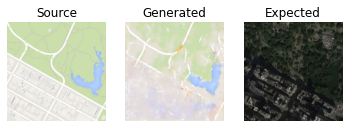

In [3]:
from ipywidgets import widgets
mods = getModels()
mod1 = widgets.Dropdown(options = mods)
submit = widgets.Button(description='Submit')
submit.on_click(process_file)
widgets.HBox([mod1, submit])